### Visualizing a 2x2 Confusion Matrix

Let's start by generating some synthetic true and predicted labels for a binary classification problem. Then, we will calculate the confusion matrix and visualize it as a heatmap.

Confusion Matrix:
[[31 13]
 [19 37]]


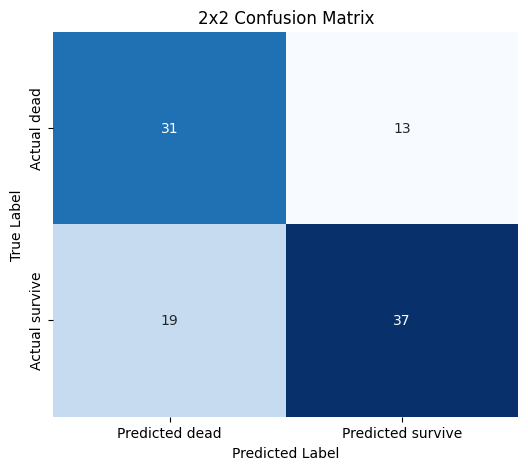

In [6]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate some sample data for binary classification
np.random.seed(42)
y_true = np.random.randint(0, 2, size=100) # True labels (0 or 1)
y_pred = np.random.randint(0, 2, size=100) # Predicted labels (0 or 1)

# Introduce some 'correct' predictions to make the matrix more interesting
y_pred[y_true == 0] = np.random.choice([0, 1], size=np.sum(y_true == 0), p=[0.8, 0.2])
y_pred[y_true == 1] = np.random.choice([0, 1], size=np.sum(y_true == 1), p=[0.3, 0.7])

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted dead', 'Predicted survive'],
            yticklabels=['Actual dead', 'Actual survive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('2x2 Confusion Matrix')
plt.show()

In [7]:
# Accuracy: (tp + tn) / (tp + tn + fp + fn)
# Error Rate: (fp + fn) / (tp + tn + fp + fn) or 1 - Accuracy
# Sensitivity (Recall): tp / (tp + fn)
# Specificity: tn / (tn + fp)
# Precision: tp / (tp + fp)

In [8]:
tn, fp, fn, tp = cm.ravel()

# Accuracy: Overall correctness of the model
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Error Rate: Proportion of incorrect predictions
error_rate = 1 - accuracy

# Sensitivity (Recall): Ability to correctly identify positive instances (survive)
sensitivity = tp / (tp + fn)

# Specificity: Ability to correctly identify negative instances (dead)
specificity = tn / (tn + fp)

# Precision: Proportion of positive predictions that were actually correct
precision = tp / (tp + fp)

print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")

Accuracy: 0.6800
Error Rate: 0.3200
Sensitivity (Recall): 0.6607
Specificity: 0.7045
Precision: 0.7400


### Interpretation of Metrics

Based on the 'dead' (negative class) and 'survive' (positive class) labels:

*   **Accuracy**: Measures the proportion of total predictions that were correct. It tells us how often the model is correct overall. A high accuracy means the model is generally good at predicting both 'dead' and 'survive' outcomes.

*   **Error Rate**: The proportion of total predictions that were incorrect. It's simply `1 - Accuracy`.

*   **Sensitivity (Recall)**: Also known as the True Positive Rate. It measures the proportion of actual 'survive' cases that were correctly identified by the model. A high sensitivity means the model is good at detecting individuals who will 'survive'.

*   **Specificity**: Also known as the True Negative Rate. It measures the proportion of actual 'dead' cases that were correctly identified by the model. A high specificity means the model is good at correctly identifying individuals who will 'die'.

*   **Precision**: Measures the proportion of positive predictions ('survive') that were actually correct. A high precision means that when the model predicts 'survive', it is very likely to be correct.

### Interpreting the Confusion Matrix

In the confusion matrix visualized above:
- The top-left cell represents **True Negatives (TN)**: cases where the model correctly predicted 0 (negative).
- The top-right cell represents **False Positives (FP)**: cases where the model incorrectly predicted 1 (positive) when the actual label was 0 (Type I error).
- The bottom-left cell represents **False Negatives (FN)**: cases where the model incorrectly predicted 0 (negative) when the actual label was 1 (Type II error).
- The bottom-right cell represents **True Positives (TP)**: cases where the model correctly predicted 1 (positive).